In [23]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [24]:
data = r"./dataset4.csv"

df = pd.read_csv(data)
print(df.head())

                                                link  \
0  https://foodbabe.com/fda-banning-artificial-dy...   
1  https://foodbabe.com/my-visit-to-the-white-hou...   
2  https://foodbabe.com/wk-kelloggs-ceo-gary-piln...   
3  https://foodbabe.com/general-mills-has-been-pu...   
4  https://foodbabe.com/food-policy-expert-asks-k...   

                                               title  annotation  \
0  FDA banning artificial dyes from our food. Wat...           0   
1  My Visit To The White House – Exposing Big Foo...           0   
2  WK Kellogg’s CEO Gary Pilnick breaks his silen...           0   
3  General Mills has been put on notice: Remove d...           0   
4  Food Policy Expert asks Kellogg’s CEO: “Would ...           0   

                                             content  
0  I just had the most impactful day in my entire...  
1  Someone needs to pinch me, because I almost ca...  
2  WK Kellogg’s CEO Gary Pilnick finally breaks h...  
3  Our movement is growing bigger 

In [25]:
import string
string.punctuation

# Checks the contents if there are empty or missing values

uncleanContents = df[df['content'].isna() | (df['content'].str.strip() == '')].index

# Print the missing/empty indices
print(f'Indices with missing or empty content: {uncleanContents}')
# print('empty content example: ' + (df['content'])[217])
# Fill NaN values with empty strings
df['content'].fillna('', inplace=True)

print(f"First file rows: {len(df)}")

Indices with missing or empty content: Index([ 635,  762,  780,  787,  851,  866, 2595, 2596, 2597, 2598, 3831, 3878,
       3890, 3898, 3905, 3928, 4692, 4693, 4718, 4731, 5569],
      dtype='int64')
First file rows: 7345


First step we are doing is data cleaning and preprocessing

In [26]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation and i not in ["'", '"', '—', '“', '”', '’', '––', '–']])
    return punctuationfree
#storing the puntuation free text
df['clean_msg']= df['content'].apply(lambda x:remove_punctuation(x))
df.head()

,link,title,annotation,content,clean_msg
0,https://foodbabe.com/fda-banning-artificial-dy...,FDA banning artificial dyes from our food. Wat...,0,I just had the most impactful day in my entire...,I just had the most impactful day in my entire...
1,https://foodbabe.com/my-visit-to-the-white-hou...,My Visit To The White House – Exposing Big Foo...,0,"Someone needs to pinch me, because I almost ca...",Someone needs to pinch me because I almost can...
2,https://foodbabe.com/wk-kelloggs-ceo-gary-piln...,WK Kellogg’s CEO Gary Pilnick breaks his silen...,0,WK Kellogg’s CEO Gary Pilnick finally breaks h...,WK Kelloggs CEO Gary Pilnick finally breaks hi...
3,https://foodbabe.com/general-mills-has-been-pu...,General Mills has been put on notice: Remove d...,0,Our movement is growing bigger and faster than...,Our movement is growing bigger and faster than...
4,https://foodbabe.com/food-policy-expert-asks-k...,Food Policy Expert asks Kellogg’s CEO: “Would ...,0,"When I saw the New York Post headline, “Ex-FDA...",When I saw the New York Post headline ExFDA fo...


In [27]:
# standardization: making all letters into lowercase
df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())
df.head()

,link,title,annotation,content,clean_msg,msg_lower
0,https://foodbabe.com/fda-banning-artificial-dy...,FDA banning artificial dyes from our food. Wat...,0,I just had the most impactful day in my entire...,I just had the most impactful day in my entire...,i just had the most impactful day in my entire...
1,https://foodbabe.com/my-visit-to-the-white-hou...,My Visit To The White House – Exposing Big Foo...,0,"Someone needs to pinch me, because I almost ca...",Someone needs to pinch me because I almost can...,someone needs to pinch me because i almost can...
2,https://foodbabe.com/wk-kelloggs-ceo-gary-piln...,WK Kellogg’s CEO Gary Pilnick breaks his silen...,0,WK Kellogg’s CEO Gary Pilnick finally breaks h...,WK Kelloggs CEO Gary Pilnick finally breaks hi...,wk kelloggs ceo gary pilnick finally breaks hi...
3,https://foodbabe.com/general-mills-has-been-pu...,General Mills has been put on notice: Remove d...,0,Our movement is growing bigger and faster than...,Our movement is growing bigger and faster than...,our movement is growing bigger and faster than...
4,https://foodbabe.com/food-policy-expert-asks-k...,Food Policy Expert asks Kellogg’s CEO: “Would ...,0,"When I saw the New York Post headline, “Ex-FDA...",When I saw the New York Post headline ExFDA fo...,when i saw the new york post headline exfda fo...


In [28]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [29]:
#defining function for tokenization

#applying function to the column
df['msg_tokenized'] = df['msg_lower'].apply(lambda x: word_tokenize(x))

print(df['msg_tokenized'][1])

['someone', 'needs', 'to', 'pinch', 'me', 'because', 'i', 'almost', 'cant', 'believe', 'this', 'is', 'happening…', 'i', 'was', 'invited', 'to', 'speak', 'at', 'the', 'white', 'house', 'this', 'week', 'to', 'advocate', 'for', 'safer', 'food', 'for', 'our', 'children', 'i', 'was', 'joined', 'by', 'a', 'powerful', 'coalition', 'of', 'moms', 'who', 'all', 'want', 'to', 'get', 'the', 'harmful', 'chemicals', 'out', 'of', 'our', 'food', 'to', 'protect', 'our', 'future', 'generations', 'to', 'have', 'this', 'opportunity', 'to', 'expose', 'the', 'truth', 'about', 'how', 'big', 'food', 'poisons', 'us', 'with', 'ingredients', 'they', 'dont', 'use', 'overseas', 'was', 'a', 'dream', 'come', 'true', 'i', 'had', 'my', 'charts', 'with', 'me', 'to', 'show', 'how', 'billiondollar', 'corporations', 'like', 'pepsico', 'kelloggs', 'mars', 'general', 'mills', 'and', 'cocacola', 'make', 'safer', 'versions', 'of', 'their', 'products', 'to', 'sell', 'in', 'other', 'countries', 'you', 'could', 'hear', 'gasps', 

In [30]:
#importing nlp library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
import nltk
# Download stopwords if you haven't already
nltk.download('stopwords')

# Initialize stopwords (use only ONE of these lines)
stopwords = set(nltk.corpus.stopwords.words('english'))

# Add custom stopwords
# custom_stopwords = ["coronavirus", "covid19", "people", "virus", "health", "china", "chinese", "new", "us", "vaccine", "wuhan", "video", "outbreak", "hospital", "says", "novel"]
# stopwords = stopwords | set(custom_stopwords)

# Add custom stopwords
custom_stopwords = ["'", '"', '—', '“', '”', '’', '––', '–', 'said', 'human', 'people', 'health', 'also', 'would', 'could', 'said', '2025', '2024', 'dec', 'feb', 'jan', 'nov', 'oct', 'sept', 'aug', 'july', 'june',
                                                                                                'may', 'april', 'march']
stopwords = stopwords | set(custom_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:

# Add custom stopwords
# custom_stopwords = ["coronavirus", "covid19", "people", "virus", "health", "china", "chinese", "new", "us", "vaccine", "wuhan", "video", "outbreak", "hospital", "says", "novel"]  # Add your custom stopwords here
# stopwords = stopwords.union(custom_stopwords)
# stopwords = set(stopwords).union(custom_stopwords)
# stopwords = set(stopwords) | set(custom_stopwords)
# stopwords = set(stopwords) | set(custom_stopwords)
# stopwords = stopwords | set(custom_stopwords)

# defining functions for removing stopwords
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

df['no_stopwords']= df['msg_tokenized'].apply(lambda x:remove_stopwords(x))
print(df['no_stopwords'][1])

['someone', 'needs', 'pinch', 'almost', 'cant', 'believe', 'happening…', 'invited', 'speak', 'white', 'house', 'week', 'advocate', 'safer', 'food', 'children', 'joined', 'powerful', 'coalition', 'moms', 'want', 'get', 'harmful', 'chemicals', 'food', 'protect', 'future', 'generations', 'opportunity', 'expose', 'truth', 'big', 'food', 'poisons', 'us', 'ingredients', 'dont', 'use', 'overseas', 'dream', 'come', 'true', 'charts', 'show', 'billiondollar', 'corporations', 'like', 'pepsico', 'kelloggs', 'mars', 'general', 'mills', 'cocacola', 'make', 'safer', 'versions', 'products', 'sell', 'countries', 'hear', 'gasps', 'room', 'went', 'ingredient', 'comparisons', 'extraordinary', 'sit', 'across', 'department', 'secretaries', 'hhs', 'usda', 'education', 'major', 'topic', 'discussion', 'im', 'grateful', 'leaders', 'highest', 'levels', 'government', 'making', 'top', 'priority', 'looking', 'make', 'changes', 'fast', 'week', 'really', 'felt', 'like', 'pinch', 'moment', 'cant', 'believe', 'far', 'w

In [33]:
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [34]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

# consideration: the results of stemming here is not human readable, but according to chatgpt: However, if your goal is purely text classification (like Naive Bayes or TF-IDF), these changes may not be a problem, as long as your model learns meaningful patterns.
df['msg_stemmed'] = df['no_stopwords'].apply(lambda x: stemming(x))
print(df['msg_stemmed'][1])

['someon', 'need', 'pinch', 'almost', 'cant', 'believ', 'happening…', 'invit', 'speak', 'white', 'hous', 'week', 'advoc', 'safer', 'food', 'children', 'join', 'power', 'coalit', 'mom', 'want', 'get', 'harm', 'chemic', 'food', 'protect', 'futur', 'gener', 'opportun', 'expos', 'truth', 'big', 'food', 'poison', 'us', 'ingredi', 'dont', 'use', 'oversea', 'dream', 'come', 'true', 'chart', 'show', 'billiondollar', 'corpor', 'like', 'pepsico', 'kellogg', 'mar', 'gener', 'mill', 'cocacola', 'make', 'safer', 'version', 'product', 'sell', 'countri', 'hear', 'gasp', 'room', 'went', 'ingredi', 'comparison', 'extraordinari', 'sit', 'across', 'depart', 'secretari', 'hh', 'usda', 'educ', 'major', 'topic', 'discuss', 'im', 'grate', 'leader', 'highest', 'level', 'govern', 'make', 'top', 'prioriti', 'look', 'make', 'chang', 'fast', 'week', 'realli', 'felt', 'like', 'pinch', 'moment', 'cant', 'believ', 'far', 'weve', 'come', 'past', 'months…', 'everyth', 'move', 'fast', 'noth', 'stop', 'us', 'week', 'spo

In [35]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\agaro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

df['msg_lemmatized'] = df['no_stopwords'].apply(lambda x:lemmatizer(x))
print(df['msg_lemmatized'][1])

['someone', 'need', 'pinch', 'almost', 'cant', 'believe', 'happening…', 'invited', 'speak', 'white', 'house', 'week', 'advocate', 'safer', 'food', 'child', 'joined', 'powerful', 'coalition', 'mom', 'want', 'get', 'harmful', 'chemical', 'food', 'protect', 'future', 'generation', 'opportunity', 'expose', 'truth', 'big', 'food', 'poison', 'u', 'ingredient', 'dont', 'use', 'overseas', 'dream', 'come', 'true', 'chart', 'show', 'billiondollar', 'corporation', 'like', 'pepsico', 'kellogg', 'mar', 'general', 'mill', 'cocacola', 'make', 'safer', 'version', 'product', 'sell', 'country', 'hear', 'gasp', 'room', 'went', 'ingredient', 'comparison', 'extraordinary', 'sit', 'across', 'department', 'secretary', 'hhs', 'usda', 'education', 'major', 'topic', 'discussion', 'im', 'grateful', 'leader', 'highest', 'level', 'government', 'making', 'top', 'priority', 'looking', 'make', 'change', 'fast', 'week', 'really', 'felt', 'like', 'pinch', 'moment', 'cant', 'believe', 'far', 'weve', 'come', 'past', 'mon

In [37]:
# Filter rows where 'annotation' is 1
authentic_tokens = df[df['annotation'] == 1]['msg_lemmatized']

# Display the filtered tokens
print("Preprocessed Tokens with Annotation = 1:")
print("Length: " + str(len(authentic_tokens)))
print(authentic_tokens)

Preprocessed Tokens with Annotation = 1:
Length: 4138
977     [20, fda, approved, new, fastacting, insulin, ...
978     [20, athlete, certain, heart, condition, long,...
979     [19, u, hospital, see, dangerous, shortage, be...
980     [19, vaccine, pregnant, woman, protects, baby,...
981     [18, fda, approved, vimseltinib, new, oral, dr...
                              ...                        
7340    [eagle, news, philippine, cancer, remains, nat...
7341    [kinshasa, dr, congo, afp, death, toll, latest...
7342    [johannesburg, south, africa, afp, country, ne...
7343    [hong, kong, china, afp, hong, kong, scientist...
7344    [paris, france, afp, france, start, culling, t...
Name: msg_lemmatized, Length: 4138, dtype: object


In [38]:
# Filter rows where 'annotation' is 1
fake_tokens = df[df['annotation'] == 0]['msg_lemmatized']

# Display the filtered tokens
print("Preprocessed Tokens with Annotation = 0:")
print("Length: " + str(len(fake_tokens)))
print(fake_tokens)

Preprocessed Tokens with Annotation = 0:
Length: 3207
0       [impactful, day, entire, career, food, activis...
1       [someone, need, pinch, almost, cant, believe, ...
2       [wk, kellogg, ceo, gary, pilnick, finally, bre...
3       [movement, growing, bigger, faster, ever, imag...
4       [saw, new, york, post, headline, exfda, food, ...
                              ...                        
6279    [zerohedge, news, past, month, technology, com...
6280    [brian, shilhavy, editor, impact, news, im, pr...
6281    [brian, shilhavy, editor, impact, news, announ...
6282    [tony, blair, bill, clinton, sam, bankmanfried...
6283    [example, young, childbearing, age, woman, die...
Name: msg_lemmatized, Length: 3207, dtype: object



Word Pool (Top 20):
[('study', 7440), ('risk', 6774), ('disease', 6166), ('patient', 5581), ('one', 5512), ('help', 5371), ('heart', 5099), ('blood', 5025), ('time', 4867), ('say', 4810), ('year', 4691), ('symptom', 4212), ('new', 4150), ('food', 4119), ('like', 3973), ('treatment', 3892), ('vaccine', 3865), ('sleep', 3817), ('cancer', 3660), ('get', 3632), ('body', 3588), ('doctor', 3566), ('day', 3564), ('many', 3527), ('cause', 3510), ('dr', 3367), ('use', 3335), ('drug', 3319), ('level', 3282), ('pain', 3228), ('need', 3219), ('make', 3201), ('case', 3111), ('medical', 3072), ('exercise', 3059), ('research', 3017), ('u', 2928), ('weight', 2918), ('diet', 2869), ('even', 2844), ('condition', 2827), ('high', 2809), ('found', 2736), ('care', 2694), ('two', 2690), ('researcher', 2678), ('take', 2645), ('medication', 2620), ('dont', 2574), ('problem', 2573)]


C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


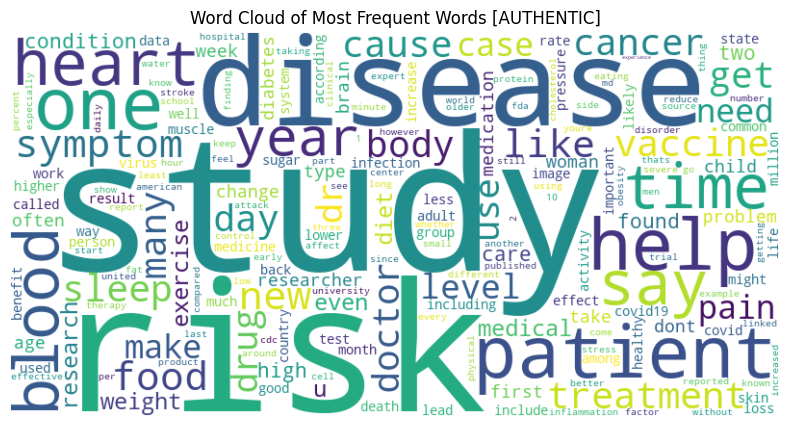

In [39]:
# Create a word pool (frequency distribution) for AUTHENTIC NEWS
word_pool = Counter()
for tokens in authentic_tokens:
    word_pool.update(tokens)

# Display the most common words
print("\nWord Pool (Top 20):")
print(word_pool.most_common(50))

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_pool)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words [AUTHENTIC]")
plt.show()


Word Pool (Top 20):
[('food', 8595), ('one', 7966), ('u', 7436), ('vaccine', 6791), ('like', 6269), ('child', 5530), ('time', 5270), ('year', 5210), ('study', 5125), ('new', 4953), ('blood', 4816), ('help', 4518), ('many', 4364), ('even', 4208), ('state', 4168), ('make', 4059), ('source', 3915), ('world', 3744), ('day', 3732), ('body', 3638), ('disease', 3508), ('system', 3401), ('get', 3363), ('use', 3327), ('risk', 3280), ('government', 3122), ('first', 3107), ('heart', 3064), ('level', 3063), ('cancer', 3031), ('found', 3023), ('oil', 2980), ('trump', 2904), ('vitamin', 2859), ('know', 2846), ('american', 2835), ('way', 2784), ('covid19', 2742), ('video', 2701), ('news', 2687), ('used', 2680), ('cause', 2674), ('article', 2660), ('need', 2640), ('according', 2590), ('see', 2579), ('take', 2571), ('two', 2549), ('public', 2543), ('much', 2510)]


C:\Users\agaro\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:733: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  x = np.array(x, subok=True, copy=copy)


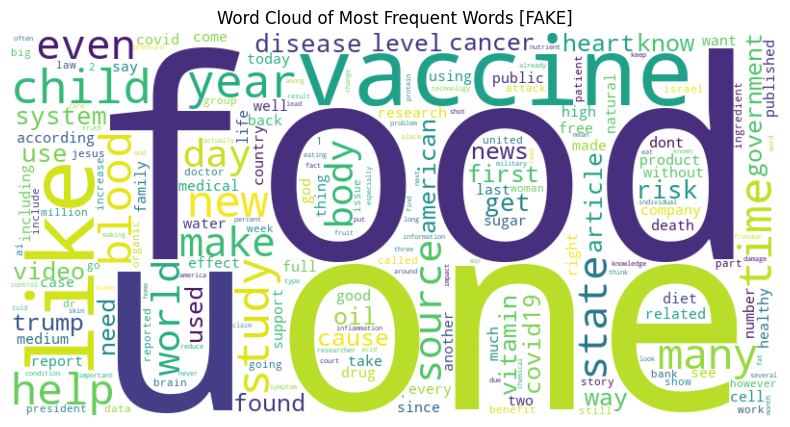

In [40]:
# Create a word pool (frequency distribution) for FAKE NEWS
word_pool = Counter()
for tokens in fake_tokens:
    word_pool.update(tokens)

# Display the most common words
print("\nWord Pool (Top 20):")
print(word_pool.most_common(50))

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_pool)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words [FAKE]")
plt.show()

Second step we will have is processing

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB

def prepare_data(df, vectorizer_type='bert', max_features=None, ngram_range=(1, 1), test_size=0.2, random_state=42):
    # Check if required columns exist
    if 'msg_lemmatized' not in df.columns or 'annotation' not in df.columns:
        raise ValueError("The DataFrame must contain 'msg_lemmatized' and 'annotation' columns.")

    # Process content column
    X = df['msg_lemmatized'].apply(lambda tokens: " ".join(tokens) if isinstance(tokens, list) else tokens)
    y = df['annotation']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize vectorizer or BERT model
    vectorizer = None
    if vectorizer_type == 'count':
        # Use CountVectorizer
        vectorizer = CountVectorizer(max_features=max_features, ngram_range=ngram_range)
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
    elif vectorizer_type == 'bert':
        # Use BERT for document embeddings
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        model = BertModel.from_pretrained('bert-base-uncased')

        # Function to generate BERT document embeddings
        def get_bert_embeddings(texts, tokenizer, model, max_length=512):
            embeddings = []
            for text in texts:
                # Tokenize and encode the text
                inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=max_length)
                
                # Get the BERT embeddings
                with torch.no_grad():
                    outputs = model(**inputs)
                
                # Use the [CLS] token embedding as the document embedding
                cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
                embeddings.append(cls_embedding)
            
            return np.array(embeddings)

        # Generate BERT document embeddings
        X_train_vec = get_bert_embeddings(X_train, tokenizer, model)
        X_test_vec = get_bert_embeddings(X_test, tokenizer, model)
    else:
        raise ValueError("Invalid vectorizer_type. Choose 'count' or 'bert'.")

    return X_train_vec, X_test_vec, y_train, y_test, vectorizer

In [42]:


def train_naive_bayes(X_train_vec, y_train):
    # Initialize and train Gaussian Naive Bayes classifier
    nb_model = GaussianNB()
    nb_model.fit(X_train_vec, y_train)  # No need for .toarray() here
    return nb_model

def train_svm(X_train_vec, y_train):
    # Initialize and train SVM classifier with increased max_iter
    svm_model = LinearSVC(random_state=42, max_iter=5000)  # Increase max_iter for convergence
    svm_model.fit(X_train_vec, y_train)
    return svm_model

def train_logistic_regression(X_train_vec, y_train):
    # Train Logistic Regression with a specified solver
    logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)  # Use 'lbfgs' solver
    logistic_model.fit(X_train_vec, y_train)
    return logistic_model

def evaluate_model(model, X_test_vec, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test_vec)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{model_name} Results:')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))

    return y_pred


In [43]:
# Main execution
from sklearn.model_selection import cross_val_score

# Main execution with cross-validation and validation split
def main(df):
    # Prepare data
    X_train_vec, X_test_vec, y_train, y_test, vectorizer = prepare_data(df)

   # Cross-validation for Naive Bayes
    nb_model = train_naive_bayes(X_train_vec, y_train)
    nb_cv_scores = cross_val_score(nb_model, X_train_vec, y_train, cv=5, scoring='accuracy')
    print(f'Naive Bayes Cross-Validation Accuracy: {nb_cv_scores.mean() * 100:.2f}%')

    # Cross-validation for SVM
    svm_model = train_svm(X_train_vec, y_train)
    svm_cv_scores = cross_val_score(svm_model, X_train_vec, y_train, cv=5, scoring='accuracy')
    print(f'SVM Cross-Validation Accuracy: {svm_cv_scores.mean() * 100:.2f}%')

    # Logistic regression
    logistic_model = train_logistic_regression(X_train_vec, y_train)
    logistic_regression_cv_scores = cross_val_score(logistic_model, X_train_vec, y_train, cv=5, scoring='accuracy')
    print(f'Logistic Regression Cross-Validation Accuracy: {logistic_regression_cv_scores.mean() * 100:.2f}%')

    # Train and evaluate Naive Bayes
    nb_predictions = evaluate_model(nb_model, X_test_vec, y_test, "Naive Bayes")

    # Train and evaluate SVM
    svm_predictions = evaluate_model(svm_model, X_test_vec, y_test, "Support Vector Machine")

    # Train and evaluate logistic regression
    logistic_regression_predictions = evaluate_model(logistic_model, X_test_vec, y_test, "Logistic Regression")


    return {
        'naive_bayes': {
            'model': nb_model,
            'predictions': nb_predictions,
            'cv_scores': nb_cv_scores
        },
        'svm': {
            'model': svm_model,
            'predictions': svm_predictions,
            'cv_scores': svm_cv_scores
        },
        'logistic_regression': {
            'model': logistic_model,
            'predictions': logistic_regression_predictions,
            'val_accuracy': logistic_regression_cv_scores
        },
        'vectorizer': vectorizer
    }

In [ ]:
# Example usage
if __name__ == "__main__":
    # Assuming df is your DataFrame
    results = main(df)